**Импортируем необходимые библиотеки**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
# Загрузка датасета
dataset = pd.read_csv('Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)
dataset = dataset.drop([0, 1, 2, 3, 504], axis=1)
dataset.columns = list(range(500))
print(f"Размерность: {dataset.shape}")
display(dataset.head())

Размерность: (23479, 500)


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,14820,14823,14824,14822,14818,14820,14824,14822,14820,14820,...,14828,14822,14815,14815,14817,14819,14820,14822,14820,14819
1,14820,14822,14820,14826,14824,14822,14820,14822,14823,14821,...,14828,14817,14824,14822,14824,14819,14820,14819,14822,14820
2,14820,14820,14822,14825,14820,14824,14824,14819,14823,14824,...,14820,14821,14820,14820,14818,14821,14823,14820,14820,14821
3,14828,14822,14818,14824,14824,14822,14820,14822,14824,14820,...,14824,14826,14822,14821,14820,14828,14820,14822,14823,14822
4,14823,14815,14823,14821,14827,14820,14823,14824,14816,14821,...,14820,14820,14823,14828,14824,14820,14824,14824,14822,14825


In [3]:
print("Пропущенные значения:")
print(dataset.isnull().sum())
display(dataset.describe())

Пропущенные значения:
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Length: 500, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,...,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000
mean,14822.972316,14822.958474,14822.970016,14822.989991,14823.003961,14822.978619,14822.968610,14822.954470,14822.963670,14822.968908,...,14822.329017,14822.315686,14822.272073,14822.171728,14822.257123,14822.317092,14822.279399,14822.278163,14822.287789,14822.283743
std,2.805884,2.833516,2.840755,2.852066,2.833412,2.836271,2.831241,2.827526,2.846291,2.814655,...,3.357997,3.373568,3.340707,3.332547,3.290301,3.232245,3.268458,3.251192,3.253340,3.242307
min,14812.000000,14812.000000,14812.000000,14811.000000,14812.000000,14812.000000,14812.000000,14811.000000,14812.000000,14809.000000,...,14800.000000,14798.000000,14802.000000,14796.000000,14802.000000,14801.000000,14798.000000,14804.000000,14800.000000,14802.000000
25%,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,...,14820.000000,14820.000000,14820.000000,14820.000000,14820.000000,14820.000000,14820.000000,14820.000000,14820.000000,14820.000000
50%,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,...,14823.000000,14823.000000,14823.000000,14822.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000
75%,14824.000000,14824.000000,14825.000000,14825.000000,14825.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,...,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000
max,14834.000000,14835.000000,14834.000000,14835.000000,14834.000000,14835.000000,14835.000000,14833.000000,14834.000000,14834.000000,...,14836.000000,14835.000000,14834.000000,14836.000000,14833.000000,14834.000000,14833.000000,14834.000000,14833.000000,14835.000000


Пропущенных значений нет

Посмотрим несколько примеров сигналов из датасета 

C:\Users\Eli\AppData\Local\Temp\ipykernel_21140\707996200.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


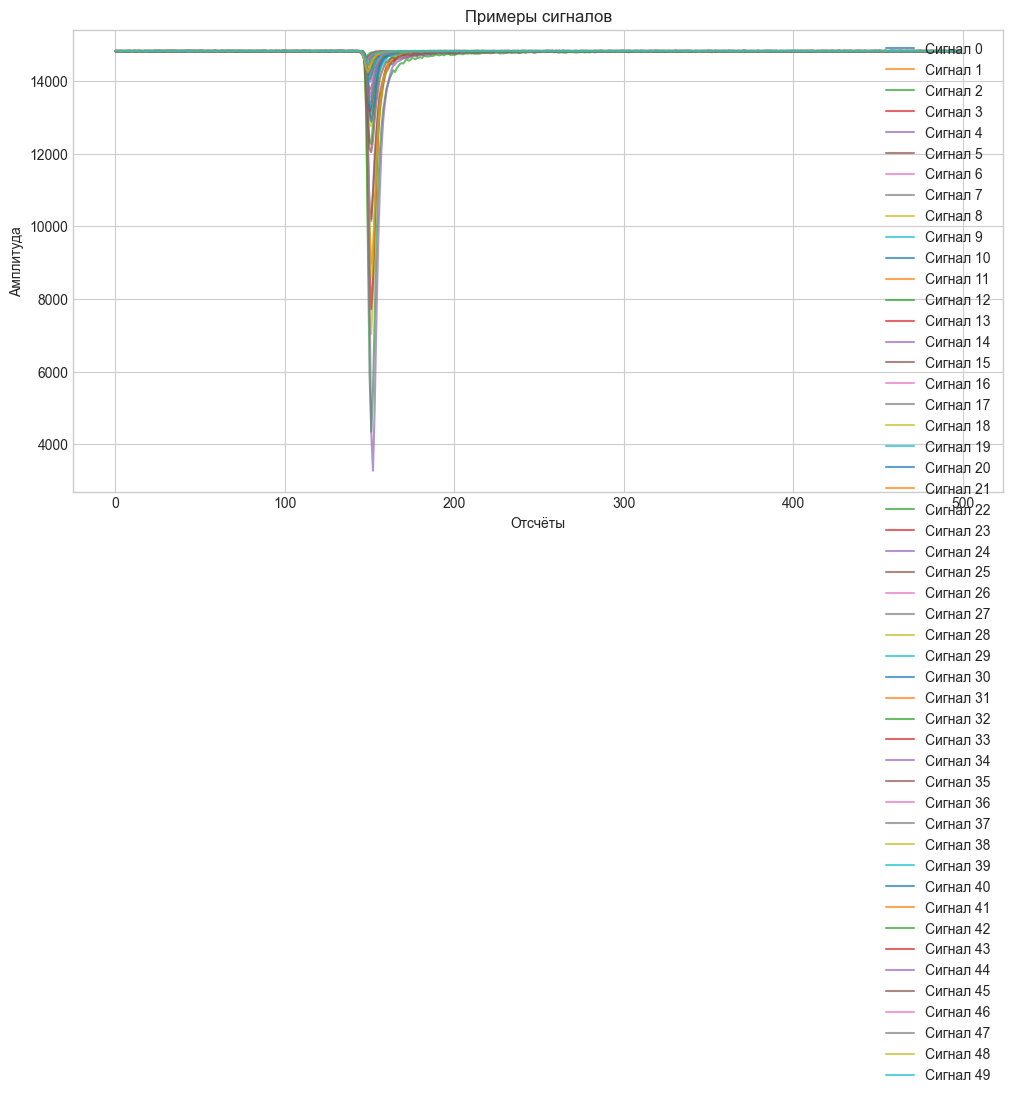

In [4]:
plt.figure(figsize=(12, 6))
for i in range(50):
    plt.plot(dataset.iloc[i].values, label=f"Сигнал {i}", alpha=0.7)
plt.title("Примеры сигналов")
plt.xlabel("Отсчёты")
plt.ylabel("Амплитуда")
plt.legend()
plt.tight_layout()
plt.show()

**Выделение сигнала**

Для начала необходимо выделить часть сигнала на основе которой потом можно будет посчитать физические признаки.


Значение сигмы возьмем за 3 в соответствие с методическими указаниями и рассмотрим первые 50 точек, из предыдущего рисунка видно, что это относительно спокойная часть, где виден только фоновый шум.

In [5]:
def extract_signal(row, pre_window=50, sigma_level=3):
    row = np.array(row)
    baseline = row[:pre_window].mean()
    noise_std = row[:pre_window].std()
    peak_idx = np.argmin(row)
    stop_idx = peak_idx
    thresh = baseline - sigma_level * noise_std
    for i in range(peak_idx, len(row)):
        if row[i] > thresh:
            stop_idx = i
            break
    signal = row[peak_idx:stop_idx]
    return signal, baseline, peak_idx, stop_idx

**Функция вычисления новых признаков**

Теперь необходимо преобразовать неинформативные сигналы в набор признаков, описывающих физику.


Для дальнейшей работы нам понадобятся amp (размах), area (площадь под сигналом), tau (показатель затухания), ratio (отношение площади к амплитуде), duration (), коэффициент psd.

In [6]:
def calc_features_classmate(row, pre_window=50, sigma_level=3, short_window=10):
    signal, baseline, peak_idx, stop_idx = extract_signal(row, pre_window, sigma_level)
    if len(signal) == 0:
        return pd.Series([np.nan]*6, index=["amp","area","tau","ratio","duration","psd"])
    
    amp = baseline - signal.min()
    
    area = np.sum(baseline - signal)
    
    duration = len(signal)
    
    try:
        x = np.arange(len(signal))
        popt, _ = curve_fit(lambda x,a,t,c: a*np.exp(-x/t)+c, x, signal, p0=(amp,8,baseline), maxfev=3000)
        tau = abs(popt[1])
    except:
        tau = np.nan
    
    short = np.sum(baseline - signal[:short_window])
    psd = (area - short)/area if area>0 else np.nan
    ratio = area/amp if amp>0 else np.nan
    return pd.Series([amp,area,tau,ratio,duration,psd],
                     index=["amp","area","tau","ratio","duration","psd"])

#Новые признаки
features_df = dataset.apply(calc_features_classmate, axis=1)
display(features_df.describe())

C:\Users\Eli\AppData\Local\Temp\ipykernel_21140\877056109.py:14: RuntimeWarning: overflow encountered in exp
  popt, _ = curve_fit(lambda x,a,t,c: a*np.exp(-x/t)+c, x, signal, p0=(amp,8,baseline), maxfev=3000)
C:\Users\Eli\AppData\Local\Temp\ipykernel_21140\877056109.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(lambda x,a,t,c: a*np.exp(-x/t)+c, x, signal, p0=(amp,8,baseline), maxfev=3000)
C:\Users\Eli\AppData\Local\Temp\ipykernel_21140\877056109.py:14: RuntimeWarning: overflow encountered in multiply
  popt, _ = curve_fit(lambda x,a,t,c: a*np.exp(-x/t)+c, x, signal, p0=(amp,8,baseline), maxfev=3000)


,amp,area,tau,ratio,duration,psd
count,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000
mean,1835.104716,9486.663454,135.823352,5.244753,38.995443,0.141218
std,2389.300501,12013.977765,3628.642091,0.982527,28.969586,0.084252
min,104.300000,320.420000,0.000689,2.274836,6.000000,0.000000
25%,308.160000,1556.960000,3.571074,4.420172,17.000000,0.075193
50%,812.540000,4266.320000,3.998493,5.109057,29.000000,0.113939
75%,2315.050000,12520.470000,4.468462,6.071758,53.000000,0.229002
max,14824.840000,95463.960000,260403.417579,8.925587,216.000000,0.352603


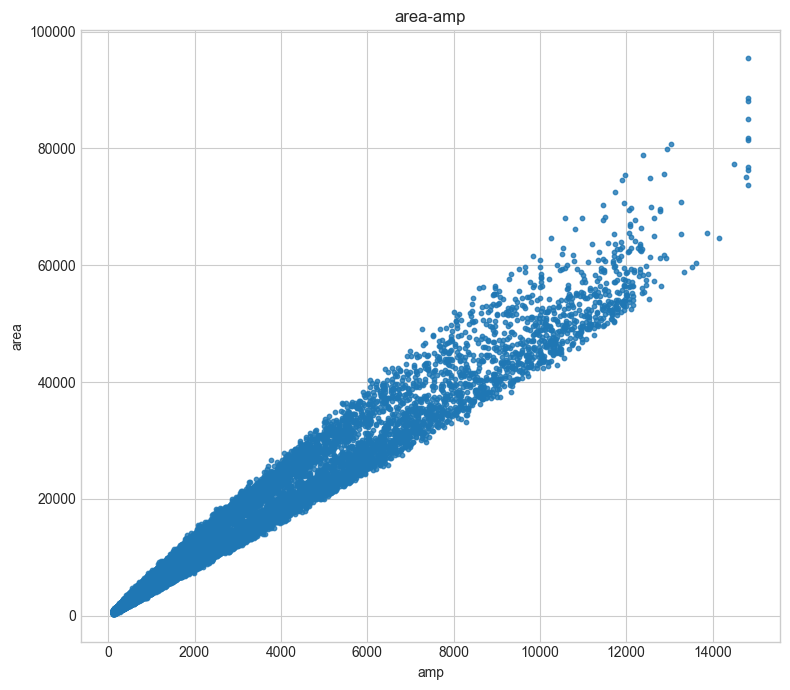

In [7]:
plt.figure(figsize=(8,7))
plt.scatter(features_df["amp"], features_df["area"], s=10, alpha=0.8)
plt.xlabel("amp")
plt.ylabel("area")
plt.title("area-amp")
plt.grid(True)
plt.tight_layout()
plt.show()

Визуализация `area-amp` позволяет уже на этом этапе оценить, что существуют отделимые группы сигналов. График по форме соответствует тому, что представлен в методических указаниях. Это подтверждает физическую обоснованность будущей кластеризации при помощи алгоритмов машинного обучения.

**Решение с использованием алгоритмов класстеризации**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score

X = features_df.dropna().copy()
feat_cols = ["amp", "area", "tau", "ratio", "duration", "psd"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[feat_cols])

**Кластеризация**

Воспользуемся KMeans и GMM, сравним результаты и на основе метрик выберем лучшую модель:

In [9]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=30)
k_labels = kmeans.fit_predict(X_scaled)
X["KMeans"] = k_labels

# GMM
gmm = GaussianMixture(n_components=3, random_state=42)
g_labels = gmm.fit_predict(X_scaled)
X["GMM"] = g_labels

**Визуализация и метрики**

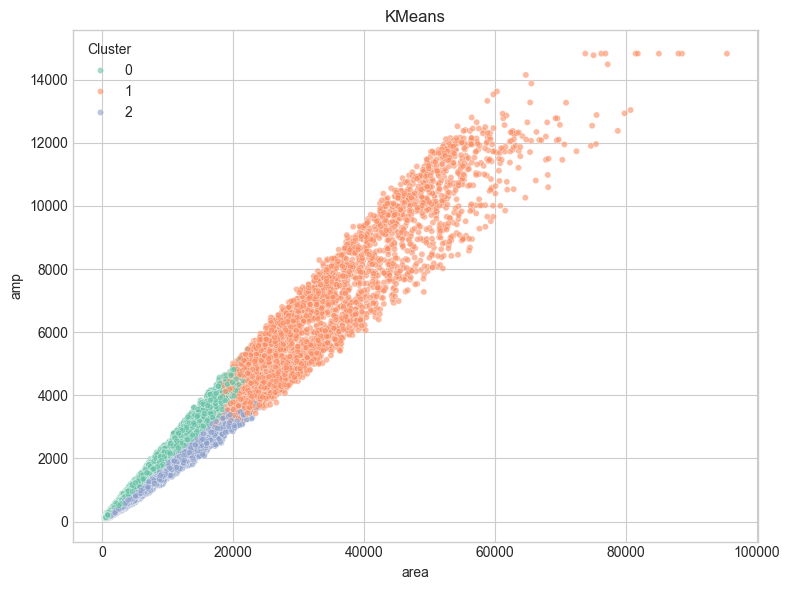

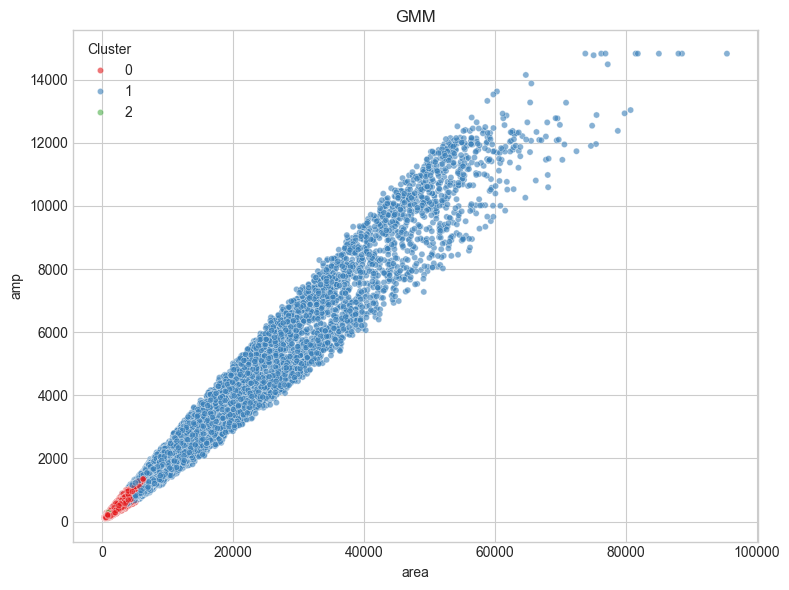

KMeans:   Silhouette = 0.486, Calinski-Harabasz = 15517.5
GMM:      Silhouette = 0.291, Calinski-Harabasz = 5819.4


In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=X, x="area", y="amp", hue="KMeans", palette="Set2",
    s=20, alpha=0.6
)
plt.title("KMeans")
plt.xlabel("area")
plt.ylabel("amp")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=X, x="area", y="amp", hue="GMM", palette="Set1",
    s=20, alpha=0.6
)
plt.title("GMM")
plt.xlabel("area")
plt.ylabel("amp")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

sil_k = silhouette_score(X_scaled, k_labels)
sil_g = silhouette_score(X_scaled, g_labels)
ch_k = calinski_harabasz_score(X_scaled, k_labels)
ch_g = calinski_harabasz_score(X_scaled, g_labels)

print(f"KMeans:   Silhouette = {sil_k:.3f}, Calinski-Harabasz = {ch_k:.1f}")
print(f"GMM:      Silhouette = {sil_g:.3f}, Calinski-Harabasz = {ch_g:.1f}")

С визуальной точки зрения алгоритм KMeans справился лучше, что подтверждается метриками. Выберем его для дальнейшей корректировки и итогового сабмишена.

**С целью соответствия физическому смыслу подкорректируем метки**

In [11]:
X["KMeans_fixed"] = X["KMeans"].replace({1: 2, 2: 1})
X["KMeans_final"] = X["KMeans_fixed"].replace({0: 1, 1: 0})

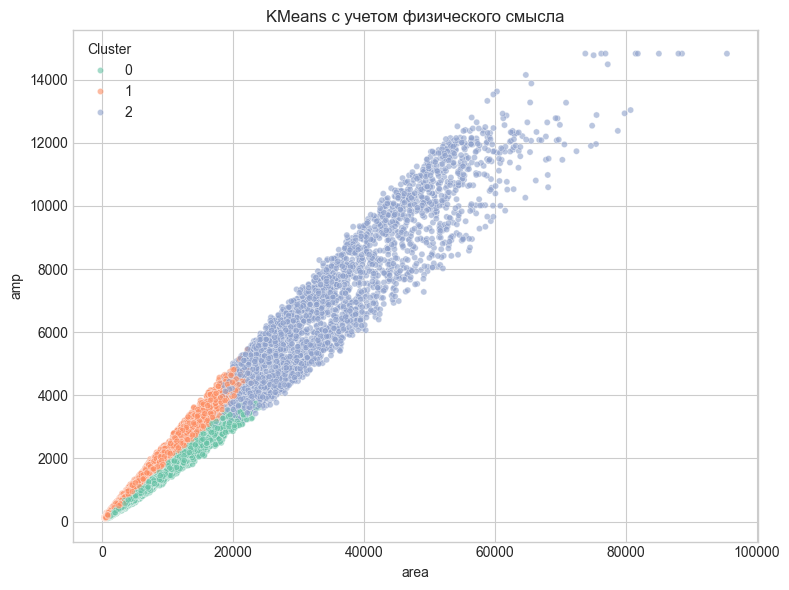

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=X, x="area", y="amp", hue="KMeans_final", palette="Set2",
    s=20, alpha=0.6
)
plt.title("KMeans с учетом физического смысла")
plt.xlabel("area")
plt.ylabel("amp")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

**Сабмишен**

In [13]:
import pandas as pd

submission = pd.DataFrame({
    "index": X.index.astype(int),
    "cluster": X["KMeans_final"].astype(int)
})

submission.to_csv("submission.csv", index=False)

KAGGLE - 0.75842

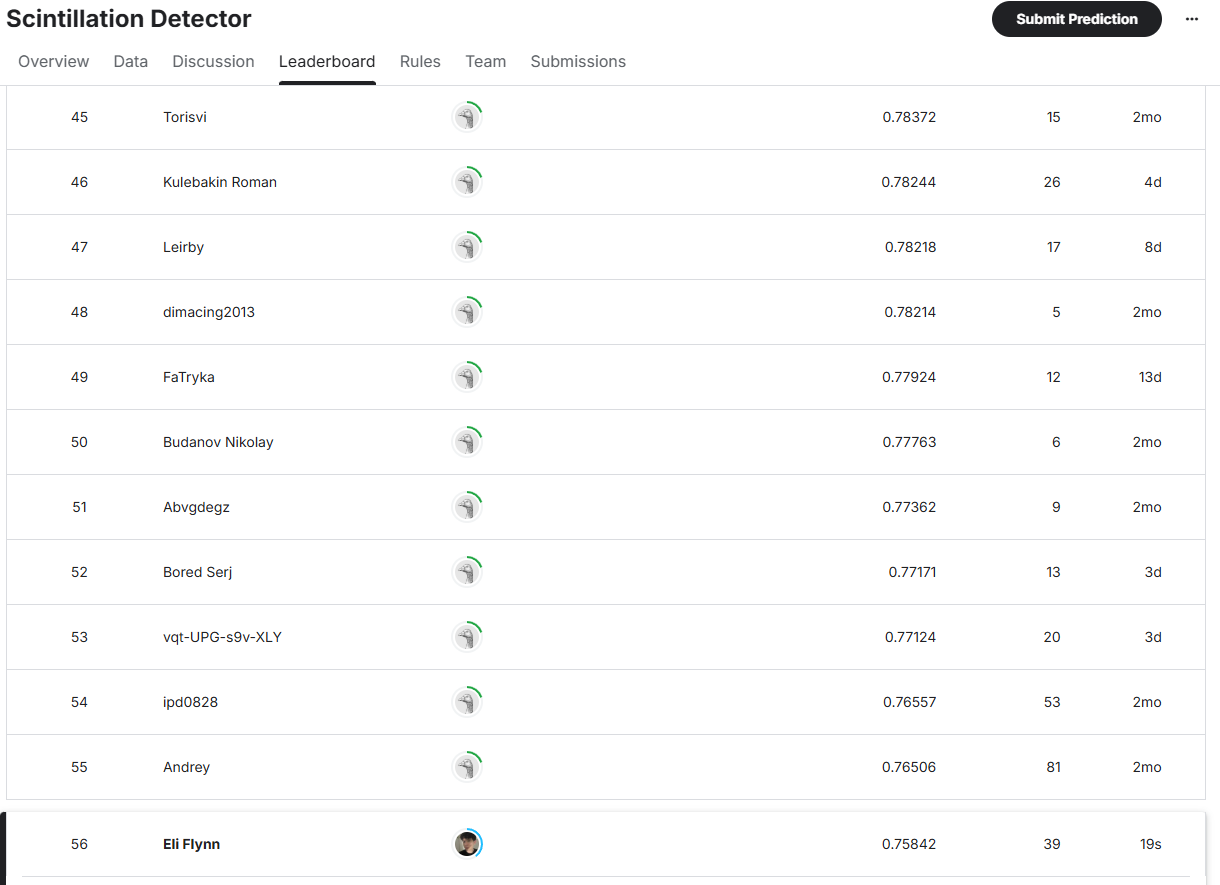